# Задача 1. Разведочный анализ

## Задача

 * [x] Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте kaggle, UCI репозитория, Google Dataset Search и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
 Считать данные и вывести их основные характеристики, описание признаков.
 Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
 * [x] (+2 балла) Произвести чистку данных (Data Cleaning). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
 Провести анализ признаков, используя визуализацию (hist(), boxplot(), countplot(), barplot() и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
 * [x] (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
 * [x] (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (Feature Engineering).

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Dataset

[Trending YouTube Video Statistics](https://www.kaggle.com/datasets/datasnaek/youtube-new)

Этот набор данных представляет собой ежедневную запись самых популярных видеороликов YouTube.

Обратите внимание, что этот набор данных является структурно улучшенной версией этого набора данных.

Этот набор данных включает в себя данные за несколько месяцев (и их подсчет) о ежедневных трендовых видеороликах YouTube.

Включены данные по регионам Россия, Мексика, Южная Корея, Япония, Индия, США, Великобритании, Германия, Канада и Франция, при этом в списке отображается до 200 трендовых видеороликов в день.

Я выбрал США.

Признаки:
* video_id - id видео
* trending_date - дата тренда
* title - название видео
* channel_title - название канала
* category_id - id категории видео
* publish_time - время публикации
* tags - теги
* views - кол-во просмотров
* likes - кол-во лайков
* dislikes - кол-во дизлайков
* comment_count - количество комментариев
* thumbnail_link - ссылка на видео
* comments_disabled - выключны ли комментарии
* rating_disabled - выключены ли отображения лайков и дизлайков
* video_error_or_removed - доступно ли видео
* description - описание

Можно поставить задачу регрессии, определяя кол-во просмотров на видео.


In [72]:
df = pd.read_csv("sample_data/USvideos.csv")

In [73]:
df.shape

(40948, 16)

In [74]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [75]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40948.000000,4.094800e+04,4.094800e+04,4.094800e+04,4.094800e+04
mean,19.972673,2.360840e+06,7.426843e+04,3.711489e+03,8.447007e+03
std,7.568259,7.394196e+06,2.288879e+05,2.903005e+04,3.743092e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818715e+05,1.809150e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823221e+06,5.541750e+04,1.938000e+03,5.755250e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


## Data cleaning

Посмотрим у каких колонок есть значения null

In [76]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

Там где description равен null заменим его на пустую строчку.

In [77]:
df = df.fillna("")

In [78]:
df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

## Feature Engineering

In [79]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


Уберем признаки, которые не имеют предсказательной силы.

In [80]:
df.drop(columns=["video_id", "trending_date", "channel_title", "thumbnail_link", "video_error_or_removed"], inplace=True)

Есть видео у которых комментарии и рейтинги отключены, эти видео будут сильно мешать оценивать кол-во просмотров по параметрам: likes, dislikes, comment_count, так как их значения будут равны нулю. Удалим эти видео, так как их сравнительно небольшое кол-во относительно всего набора видео.

In [81]:
df.loc[df["comments_disabled"] == True].shape[0]

633

In [82]:
df.loc[df["ratings_disabled"] == True].shape[0]

169

In [83]:
df = df.loc[df["comments_disabled"] != True]

In [84]:
df = df.loc[df["ratings_disabled"] != True]

Удалим столбцы comments_disabled, ratings_disabled, так как они уже не имеют смысла.

In [85]:
df.drop(columns=["comments_disabled", "ratings_disabled"], inplace=True)

Признак publish_time в таком виде 2017-11-13T17:13:01.000Z бессмысленен, поэтому его можно разбить на 25 классов от 0 до 24. То есть приведенный пример будет равен 17.

In [86]:
def get_hours_publish_time(publish_time):
  result_string = ""
  start_symbol = 'T'
  number_symbols = 6
  flagT = 0
  for c in publish_time:
    if flagT == 0 and c != start_symbol:
        continue
    elif flagT == 0:
        flagT += 1
        continue
    elif flagT < number_symbols:
        flagT += 1
        result_string += c
    else:
        break
  hours = int(result_string[0:2])
  mins = int(result_string[3:5])
  if mins >= 30:
      return hours + 1
  else:
      return hours

df["publish_time"] = df["publish_time"].apply(get_hours_publish_time)

Признаки title, tags, description заменим на числовые, а именно кол-во знаков.

In [87]:
df["title"] = df["title"].apply(len)
df["tags"] = df["tags"].apply(len)
df["description"] = df["description"].apply(len)

В итоге:

In [88]:
df.head()

,title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description
0,34,22,17,15,748374,57527,2966,15954,1410
1,62,24,8,102,2418783,97185,6146,12703,630
2,53,23,19,314,3191434,146033,5339,8181,1177
3,32,24,11,477,343168,10172,666,2146,1403
4,24,24,18,120,2095731,132235,1989,17518,636


## Анализ признаков

### Зависимость кол-ва просмотров от размера заголовка видео

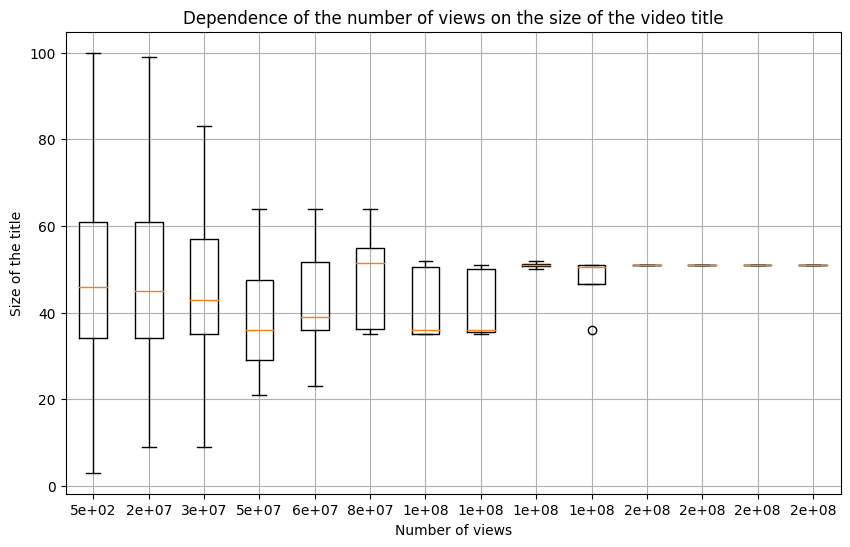

In [89]:
bins = np.linspace(df["views"].min(), df["views"].max(), 15)

boxplot_data = [df.loc[(df["views"] >= bins[i]) & (df["views"] < bins[i+1])]["title"].values
               for i in range(len(bins) - 1)]

plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=[f'{bins[i]:.0e}' for i in range(len(bins) - 1)])
plt.title("Dependence of the number of views on the size of the video title")
plt.ylabel("Size of the title")
plt.xlabel("Number of views")
plt.grid(True)

plt.show()

Можно видеть что медиана длины заголовка примерно от 35 до 50. Можно удалить этот признак так как он не несет хорошей предсказательной силы.

In [90]:
df.drop(columns=["title"], inplace=True)

### Зависимость кол-ва просмотров от длины тегов

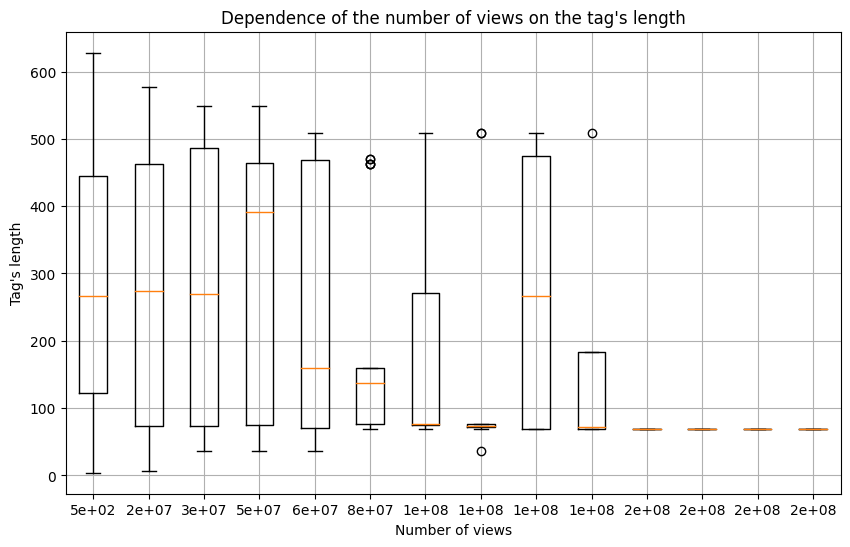

In [91]:
bins = np.linspace(df["views"].min(), df["views"].max(), 15)

boxplot_data = [df.loc[(df["views"] >= bins[i]) & (df["views"] < bins[i+1])]["tags"].values
               for i in range(len(bins) - 1)]

plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=[f'{bins[i]:.0e}' for i in range(len(bins) - 1)])
plt.title("Dependence of the number of views on the tag's length")
plt.ylabel("Tag's length")
plt.xlabel("Number of views")
plt.grid(True)

plt.show()

Можно видеть что размер тегов не влияет на популярность видео. Можно удалить этот признак так как он не несет хорошей предсказательной силы.

In [ ]:
df.drop(columns=["tags"], inplace=True)

### Зависимость кол-ва просмотров от кол-ва лайков

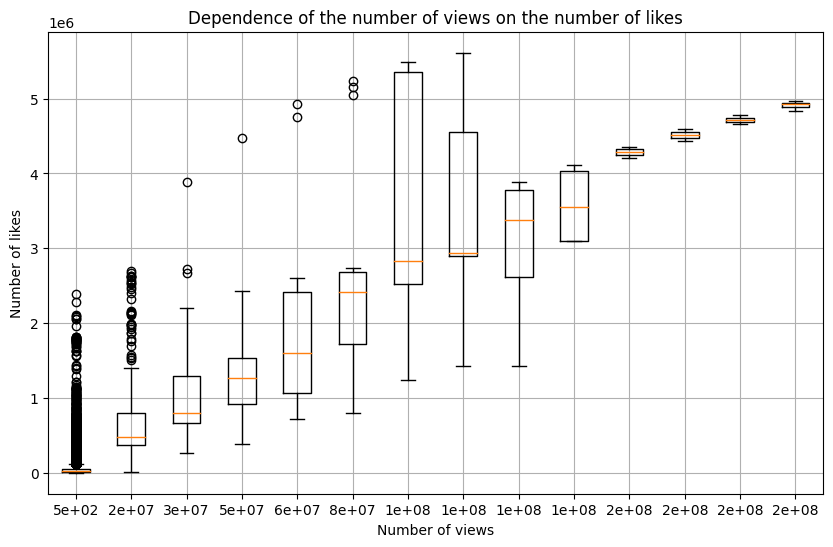

In [94]:
bins = np.linspace(df["views"].min(), df["views"].max(), 15)

boxplot_data = [df.loc[(df["views"] >= bins[i]) & (df["views"] < bins[i+1])]["likes"].values
               for i in range(len(bins) - 1)]

plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=[f'{bins[i]:.0e}' for i in range(len(bins) - 1)])
plt.title("Dependence of the number of views on the number of likes")
plt.ylabel("Number of likes")
plt.xlabel("Number of views")
plt.grid(True)

plt.show()

Можно видеть положительную корреляцию кол-ва просмотров и кол-ва лайков

### Зависимость кол-ва просмотров от кол-ва дизлайков

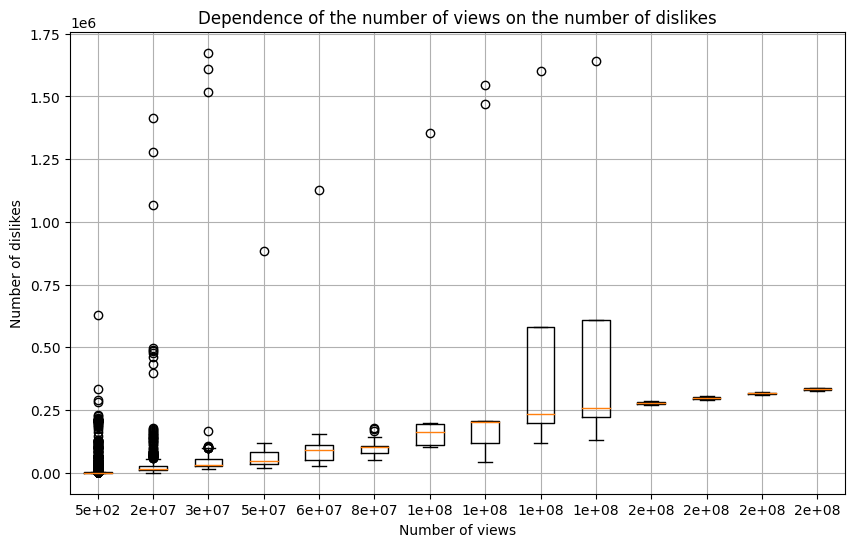

In [96]:
bins = np.linspace(df["views"].min(), df["views"].max(), 15)

boxplot_data = [df.loc[(df["views"] >= bins[i]) & (df["views"] < bins[i+1])]["dislikes"].values
               for i in range(len(bins) - 1)]

plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=[f'{bins[i]:.0e}' for i in range(len(bins) - 1)])
plt.title("Dependence of the number of views on the number of dislikes")
plt.ylabel("Number of dislikes")
plt.xlabel("Number of views")
plt.grid(True)

plt.show()

Можно видеть положительную корреляцию кол-ва просмотров и кол-ва дизлайков, где скорость графика с ростом просмотром перестает расти.

### Зависимость кол-ва просмотров от кол-ва комментариев

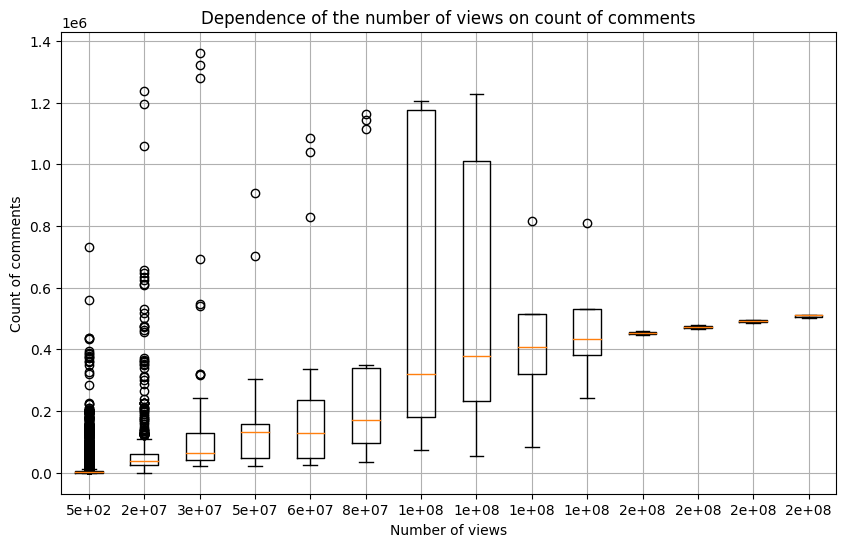

In [97]:
bins = np.linspace(df["views"].min(), df["views"].max(), 15)

boxplot_data = [df.loc[(df["views"] >= bins[i]) & (df["views"] < bins[i+1])]["comment_count"].values
               for i in range(len(bins) - 1)]

plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=[f'{bins[i]:.0e}' for i in range(len(bins) - 1)])
plt.title("Dependence of the number of views on count of comments")
plt.ylabel("Count of comments")
plt.xlabel("Number of views")
plt.grid(True)

plt.show()

Можно видеть положительную корреляцию кол-ва просмотров и кол-ва комментариев.

Посмотрим зависимость времени публикации от кол-ва просмотров.

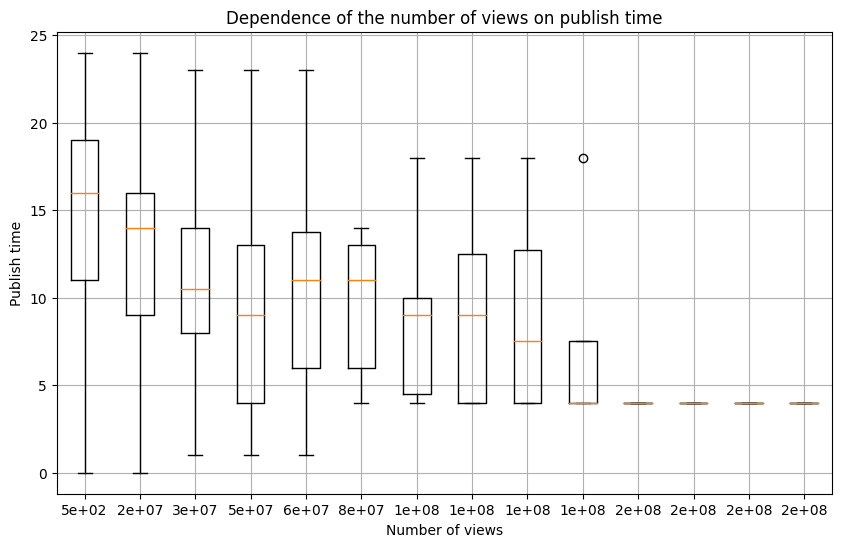

In [99]:
bins = np.linspace(df["views"].min(), df["views"].max(), 15)

boxplot_data = [df.loc[(df["views"] >= bins[i]) & (df["views"] < bins[i+1])]["publish_time"].values
               for i in range(len(bins) - 1)]

plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=[f'{bins[i]:.0e}' for i in range(len(bins) - 1)])
plt.title("Dependence of the number of views on publish time")
plt.ylabel("Publish time")
plt.xlabel("Number of views")
plt.grid(True)

plt.show()

Можно видеть, что в среднем более популярные видео были выложены раньше, чем не популярные.

## Зависимость между всеми колличественными признаками

### Матрица корреляции

<Axes: >

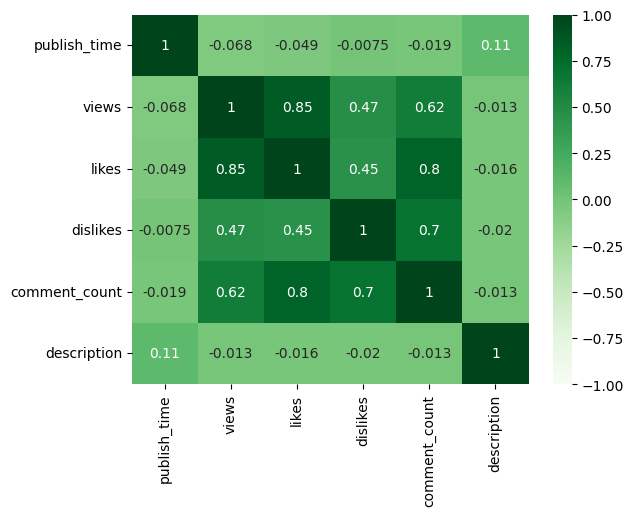

In [100]:
df_quantitative = df.drop(columns=["category_id"])
sns.heatmap(df_quantitative.corr(), vmin=-1, vmax=1, annot=True, cmap="Greens")

Видно есть положительная корреляция между кол-вом просмотров и кол-вом лайков, кол-вом просмотров и кол-вом дизлайков, кол-вом просмотров и кол-вом комментариев. Размер описания почти не коррелирует.